<h1>Challenge 1: The Catalan Numbers</h1>

> **Problem statement**

The Catalan numbers are a special sequence of numbers given by the following set of formulas:

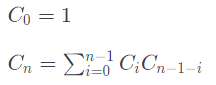

The first expression gives the base case of the formula. The second expression says that the n^(th) Catalan number is simply the sum of products of specific Catalan number pairs. These specific pairs are just Catalan numbers with the same distance from either end of the series.


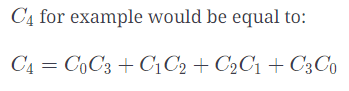

You can already see the hefty amount of recursion in this series.

The Catalan numbers form the following series: (1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862…)


> **Applications of the Catalan numbers**

The Catalan numbers readily appear in many interesting counting problems.

*   The number of ways to put parentheses around n numbers for multiplication.

*   The number of paths to climb up a 2n x 2n grid without going above the diagonal.

*   The number of possible binary trees with n leaf nodes. This has been shown in the visualization below.

> **Input**

Your program will take as input a number, n. n is a non-negative integer i.e. n ≥0.

n = 4

> **Output**

Your program will evaluate n^(​th) Catalan number and return it.

catalan(4) = 14

catalan(6) = 132

> **Coding challenge**

You should write a bottom-up algorithm for this challenge and you should use tabulation. We will test your solution with bigger numbers and if tabulation is not done properly, tests might be timed out.

If you plan to write a recursive solution first, you may check its correctness by setting stressTesting to False. If you plan to write a top-down algorithm with memoization first, you may check its correctness by setting testforBottomUp to False. If you only write a bottom-up algorithm, you can test without changing these variables.

> **Solution #1: Simple recursion**




In [ ]:
def catalan(n):
  if n == 0:      # base case; C(0) = 1
    return 1
  sum = 0
  # iterate from 1...n to evaluate: C(0)*C(n-1) + C(1)*C(n-2) ... + C(n-1)*C(0)
  for i in range(n):  
    sum += (catalan(i) * catalan(n-1-i))  # C(i)*C(n-1-i)
  return sum

print(catalan(4))

14


> **Solution #2: Top-down approach**




Before using dynamic programming, let’s see if this problem satisfies both conditions of dynamic programming.

**Optimal substructure**

Every Catalan number is constructed using all the previous Catalan numbers. Thus, if I had n Catalan numbers available, I could construct n+1^(th) by simply using these n Catalan numbers. This shows the problem has an optimal substructure.

**Overlapping subproblem**

You can already see many repeating subproblems in the formula of the Catalan numbers. Still, to get a better idea, look at the visualization below to see the number of overlapping subproblems.

In [ ]:
def catalan_memo(n, memo):
  if n == 0:          # base case; C(0) = 1
    return 1
  elif n in memo:       # if n already evaluated, return from dp
    return memo[n]
  sum = 0
  # iterate from 1...n to evaluate: C(0)*C(n-1) + C(1)*C(n-2) ... + C(n-1)*C(0)
  for i in range(n):  
    sum += (catalan_memo(i, memo) * catalan_memo(n-1-i, memo))  # C(i)*C(n-1-i)
  memo[n] = sum         # store result in dp
  return memo[n]


def catalan(n):
  memo = {}
  return catalan_memo(n, memo)

print(catalan(400))

468933770245269643415426623820332950926598050446734622056062322861531288679676765703102327743067632094684687082190703636890930094713079530547498701434550228916097506991616461590124204969620357303273005799369720421582124051666126292785640


>**Solution #3: Top-down approach**




If you plug a bigger number (say 1000) into solution two, it will not evaluate due to RecursionError. Also, we have seen that recursion can be expensive as well, so let’s look at a bottom-up solution to this problem.

In [ ]:
def catalan(n):
  table = [None] * (n+1)  # tabulating 
  table[0] = 1            # handling the base case
  for i in range(1,n+1):  # iterating to fill up the tabulation table
    table[i] = 0          # initializing the i-th value to 0
    # iterate from 0 to i; according to formula of catalan i.e. 
    # C0*Ci + C1*Ci-1 + ... Ci*C0
    for j in range(i):    
      table[i] += (table[j] * table[i-j-1]) # C(j) * C(i-j-1)
  return table[n]         

print(catalan(1000))

2046105521468021692642519982997827217179245642339057975844538099572176010191891863964968026156453752449015750569428595097318163634370154637380666882886375203359653243390929717431080443509007504772912973142253209352126946839844796747697638537600100637918819326569730982083021538057087711176285777909275869648636874856805956580057673173655666887003493944650164153396910927037406301799052584663611016897272893305532116292143271037140718751625839812072682464343153792956281748582435751481498598087586998603921577523657477775758899987954012641033870640665444651660246024318184109046864244732001962029120
